In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
data.isnull().sum().sort_values(ascending=False)

default.payment.next.month    0
PAY_6                         0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
BILL_AMT1                     0
PAY_AMT6                      0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
ID                            0
dtype: int64

In [17]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [22]:
data = data.rename(columns={'default.payment.next.month': 'def_pay', 'PAY_0':'PAY_1'})
fill = (data.EDUCATION==5)|(data.EDUCATION==6)|(data.EDUCATION==0)
data.loc[fill, 'EDUCATION']=4
data.loc[data.MARRIAGE==0, 'MARRIAGE']=3

In [23]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [24]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [25]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [26]:
data.EDUCATION.describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [27]:
data.SEX.describe()

count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64

In [28]:
data.MARRIAGE.describe()

count    30000.000000
mean         1.557267
std          0.521405
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [29]:
data.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [30]:
data.PAY_1.describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_1, dtype: float64

In [31]:
data.PAY_2.describe()

count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64

In [32]:
data.PAY_3.describe()

count    30000.000000
mean        -0.166200
std          1.196868
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_3, dtype: float64

In [33]:
data.PAY_4.describe()

count    30000.000000
mean        -0.220667
std          1.169139
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_4, dtype: float64

In [34]:
data.PAY_5.describe()

count    30000.000000
mean        -0.266200
std          1.133187
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_5, dtype: float64

In [35]:
data.PAY_6.describe()

count    30000.000000
mean        -0.291100
std          1.149988
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_6, dtype: float64

In [36]:
data.BILL_AMT1.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [37]:
data.BILL_AMT2.describe()

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

In [38]:
data.BILL_AMT3.describe()

count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

In [39]:
data.BILL_AMT4.describe()

count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64

In [40]:
data.BILL_AMT5.describe()

count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64

In [41]:
data.BILL_AMT6.describe()

count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64

In [42]:
data.PAY_AMT1.describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

In [43]:
data.PAY_AMT2.describe()

count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64

In [44]:
data.PAY_AMT3.describe()

count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64

In [45]:
data.PAY_AMT4.describe()

count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64

In [46]:
data.PAY_AMT5.describe()

count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: PAY_AMT5, dtype: float64

In [47]:
data.PAY_AMT6.describe()

count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64

In [48]:
data.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [49]:
def formgroup (Col1, Col2):
    res = data.groupby([Col1, Col2]).size().unstack()
    return res

In [52]:
data['SE_MA']=data.SEX*data.MARRIAGE
formgroup('SE_MA', 'def_pay')
data['SE_MA_2']=0
data.loc[((data.SEX==1)&(data.MARRIAGE==1)), 'SE_MA_2']=1
data.loc[((data.SEX==2)&(data.MARRIAGE==2)), 'SE_MA_2']=2
data.loc[((data.SEX==3)&(data.MARRIAGE==3)), 'SE_MA_2']=3
data.loc[((data.SEX==4)&(data.MARRIAGE==4)), 'SE_MA_2']=4
data.loc[((data.SEX==5)&(data.MARRIAGE==5)), 'SE_MA_2']=5
data.loc[((data.SEX==6)&(data.MARRIAGE==6)), 'SE_MA_2']=6
formgroup('SE_MA_2', 'def_pay')
del data['SE_MA']
data=data.rename(columns={'SE_MA_2':'SE_MA'})

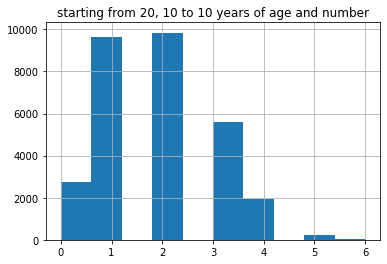

In [54]:
data['AgeBin']=0
data.loc[((data['AGE']>20)&(data['AGE']<30)), 'AgeBin']=1
data.loc[((data['AGE']>30)&(data['AGE']<40)), 'AgeBin']=2
data.loc[((data['AGE']>40)&(data['AGE']<50)), 'AgeBin']=3
data.loc[((data['AGE']>50)&(data['AGE']<60)), 'AgeBin']=4
data.loc[((data['AGE']>60)&(data['AGE']<70)), 'AgeBin']=5
data.loc[((data['AGE']>70)&(data['AGE']<81)), 'AgeBin']=6
plt.figure()
plt.title('starting from 20, 10 to 10 years of age and number')
data.AgeBin.hist()
plt.show()

In [56]:
agedefpay = formgroup('AgeBin', 'def_pay')
print(agedefpay)
agesex = formgroup('AgeBin','SEX')
print(agesex)

def_pay     0     1
AgeBin             
0        2166   587
1        7421  2197
2        7841  2002
3        4296  1298
4        1449   481
5         181    66
6          10     5
SEX        1     2
AgeBin            
0       1129  1624
1       3281  6337
2       4004  5839
3       2412  3182
4        917  1013
5        136   111
6          9     6


In [58]:
data['SE_AG']=0
data.loc[((data.SEX==1)&(data.AgeBin==1)), 'SE_AG']=1
data.loc[((data.SEX==1)&(data.AgeBin==2)), 'SE_AG']=2
data.loc[((data.SEX==1)&(data.AgeBin==3)), 'SE_AG']=3
data.loc[((data.SEX==1)&(data.AgeBin==4)), 'SE_AG']=4
data.loc[((data.SEX==1)&(data.AgeBin==5)), 'SE_AG']=5
data.loc[((data.SEX==2)&(data.AgeBin==1)), 'SE_AG']=6
data.loc[((data.SEX==2)&(data.AgeBin==2)), 'SE_AG']=7
data.loc[((data.SEX==2)&(data.AgeBin==3)), 'SE_AG']=8
data.loc[((data.SEX==2)&(data.AgeBin==4)), 'SE_AG']=9
data.loc[((data.SEX==2)&(data.AgeBin==5)), 'SE_AG']=10
formgroup('SE_AG', 'def_pay')

def_pay,0,1
SE_AG,,
0,2176,592
1,2492,789
2,3078,926
3,1808,604
4,666,251
5,102,34
6,4929,1408
7,4763,1076
8,2488,694


In [59]:
data['active_6'] = 1
data['active_5'] = 1
data['active_4'] = 1
data['active_3'] = 1
data['active_2'] = 1
data['active_1'] = 1
data.loc[((data.PAY_6 == 0) & (data.BILL_AMT6 == 0) & (data.PAY_AMT6 == 0)) , 'active_6'] = 0
data.loc[((data.PAY_5 == 0) & (data.BILL_AMT5 == 0) & (data.PAY_AMT5 == 0)) , 'active_5'] = 0
data.loc[((data.PAY_4 == 0) & (data.BILL_AMT4 == 0) & (data.PAY_AMT4 == 0)) , 'active_4'] = 0
data.loc[((data.PAY_3 == 0) & (data.BILL_AMT3 == 0) & (data.PAY_AMT3 == 0)) , 'active_3'] = 0
data.loc[((data.PAY_2 == 0) & (data.BILL_AMT2 == 0) & (data.PAY_AMT2 == 0)) , 'active_2'] = 0
data.loc[((data.PAY_1 == 0) & (data.BILL_AMT1 == 0) & (data.PAY_AMT1 == 0)) , 'active_1'] = 0

In [60]:
pd.Series([data[data.active_6 == 1].def_pay.count(),
          data[data.active_5 == 1].def_pay.count(),
          data[data.active_4 == 1].def_pay.count(),
          data[data.active_3 == 1].def_pay.count(),
          data[data.active_2 == 1].def_pay.count(),
          data[data.active_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    29569
5    29743
4    29816
3    29787
2    29815
1    30000
dtype: int64

In [61]:
data['average_5'] = ((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5']))) / data['LIMIT_BAL']
data['average_4'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4']))) / 2) / data['LIMIT_BAL']
data['average_3'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4'])) +
                 (data['BILL_AMT3'] - (data['BILL_AMT4'] - data['PAY_AMT3']))) / 3) / data['LIMIT_BAL']
data['average_2'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4'])) +
                 (data['BILL_AMT3'] - (data['BILL_AMT4'] - data['PAY_AMT3'])) +
                 (data['BILL_AMT2'] - (data['BILL_AMT3'] - data['PAY_AMT2']))) / 4) / data['LIMIT_BAL']
data['average_1'] = (((data['BILL_AMT5'] - (data['BILL_AMT6'] - data['PAY_AMT5'])) +
                 (data['BILL_AMT4'] - (data['BILL_AMT5'] - data['PAY_AMT4'])) +
                 (data['BILL_AMT3'] - (data['BILL_AMT4'] - data['PAY_AMT3'])) +
                 (data['BILL_AMT2'] - (data['BILL_AMT3'] - data['PAY_AMT2'])) +
                 (data['BILL_AMT1'] - (data['BILL_AMT2'] - data['PAY_AMT1']))) / 5) / data['LIMIT_BAL']
average=data[['LIMIT_BAL', 'average_5', 'BILL_AMT5', 'average_4', 'BILL_AMT4','average_3', 'BILL_AMT3',
    'average_2', 'BILL_AMT2', 'average_1', 'BILL_AMT1', 'def_pay']].sample(20)
print(average)

       LIMIT_BAL  average_5  BILL_AMT5  average_4  BILL_AMT4  average_3  \
14446    80000.0   0.014212    68247.0   0.014837    69484.0   0.017058   
10911    30000.0   0.150100     4503.0   0.121717     2800.0   0.110644   
9285     50000.0   0.009420    19079.0   0.009220    18530.0   0.010153   
24680   100000.0   0.070200     9689.0   0.111325    15229.0   0.098050   
5564    140000.0   0.038164   136631.0   0.037671   136807.0   0.037679   
11757    60000.0   0.000000        0.0   0.000000        0.0   0.000000   
251      30000.0   0.733367    22001.0   0.436833    25255.0   0.344011   
12190   250000.0   0.402264   100566.0   0.354236    76552.0   0.240920   
14549   200000.0   0.001950      390.0   0.001950      390.0   0.003350   
22955   420000.0   0.033407   196082.0   0.032381   202241.0   0.139948   
14779    30000.0   0.000000        0.0   0.350000    21000.0   0.295578   
7454    120000.0   0.027483   117358.0   0.026979   116316.0   0.041633   
7600     20000.0   0.0195

In [62]:
data['InvoiceLimit_6'] = (data.LIMIT_BAL - data.BILL_AMT6) / data.LIMIT_BAL
data['InvoiceLimit_5'] = (data.LIMIT_BAL - data.BILL_AMT5) / data.LIMIT_BAL
data['InvoiceLimit_4'] = (data.LIMIT_BAL - data.BILL_AMT4) / data.LIMIT_BAL
data['InvoiceLimit_3'] = (data.LIMIT_BAL - data.BILL_AMT3) / data.LIMIT_BAL
data['InvoiceLimit_2'] = (data.LIMIT_BAL - data.BILL_AMT2) / data.LIMIT_BAL
data['InvoiceLimit_1'] = (data.LIMIT_BAL - data.BILL_AMT1) / data.LIMIT_BAL
InvoiceLimit=data[['InvoiceLimit_6', 'InvoiceLimit_5', 'InvoiceLimit_4', 'InvoiceLimit_3', 'InvoiceLimit_2',
   'InvoiceLimit_1', 'def_pay']].sample(20)
print(InvoiceLimit)

       InvoiceLimit_6  InvoiceLimit_5  InvoiceLimit_4  InvoiceLimit_3  \
1863         0.652020        0.603600        0.651980        0.357980   
12821        0.882456        0.863240        0.841380        0.819636   
22706        0.978670        0.966278        0.984296        0.973200   
15466        0.573568        0.582309        0.586868        0.592332   
24520        0.920209        0.922406        0.911729        0.909137   
10998        0.937500        0.662767        0.481000        0.824867   
8385         1.000000        0.995167        0.995167        1.000167   
2586         0.346933        0.352083        0.367283        0.379667   
10507        1.000000        1.000000        1.000000        1.000000   
26565        0.514862        0.524795        0.524938        0.532319   
577          0.948937        0.993275        0.948975        0.896150   
21933        0.277793        0.253866        0.268883        0.170400   
26789        0.909260        0.966760        1.0000

In [63]:
data['PAY_1_-1'] = (data.PAY_1 == -1)
data['PAY_1_-2'] = (data.PAY_1 == -2)
data['PAY_1_0'] = (data.PAY_1 == 0)
data['PAY_1_1'] = (data.PAY_1 == 1)
data['PAY_1_2'] = (data.PAY_1 == 2)
data['PAY_1_3'] = (data.PAY_1 == 3)
data['PAY_1_4'] = (data.PAY_1 == 4)
data['PAY_1_5'] = (data.PAY_1 == 5)
data['PAY_1_6'] = (data.PAY_1 == 6)
data['PAY_1_7'] = (data.PAY_1 == 7)
data['PAY_1_8'] = (data.PAY_1 == 8)

data['PAY_2_-1'] = (data.PAY_1 == -1)
data['PAY_2_-2'] = (data.PAY_1 == -2)
data['PAY_2_0'] = (data.PAY_1 == 0)
data['PAY_2_1'] = (data.PAY_1 == 1)
data['PAY_2_2'] = (data.PAY_1 == 2)
data['PAY_2_3'] = (data.PAY_1 == 3)
data['PAY_2_4'] = (data.PAY_1 == 4)
data['PAY_2_5'] = (data.PAY_1 == 5)
data['PAY_2_6'] = (data.PAY_1 == 6)
data['PAY_2_7'] = (data.PAY_1 == 7)
data['PAY_2_8'] = (data.PAY_1 == 8)

data['PAY_3_-1'] = (data.PAY_1 == -1)
data['PAY_3_-2'] = (data.PAY_1 == -2)
data['PAY_3_0'] = (data.PAY_1 == 0)
data['PAY_3_1'] = (data.PAY_1 == 1)
data['PAY_3_2'] = (data.PAY_1 == 2)
data['PAY_3_3'] = (data.PAY_1 == 3)
data['PAY_3_4'] = (data.PAY_1 == 4)
data['PAY_3_5'] = (data.PAY_1 == 5)
data['PAY_3_6'] = (data.PAY_1 == 6)
data['PAY_3_7'] = (data.PAY_1 == 7)
data['PAY_3_8'] = (data.PAY_1 == 8)

data['PAY_4_-1'] = (data.PAY_1 == -1)
data['PAY_4_-2'] = (data.PAY_1 == -2)
data['PAY_4_0'] = (data.PAY_1 == 0)
data['PAY_4_1'] = (data.PAY_1 == 1)
data['PAY_4_2'] = (data.PAY_1 == 2)
data['PAY_4_3'] = (data.PAY_1 == 3)
data['PAY_4_4'] = (data.PAY_1 == 4)
data['PAY_4_5'] = (data.PAY_1 == 5)
data['PAY_4_6'] = (data.PAY_1 == 6)
data['PAY_4_7'] = (data.PAY_1 == 7)
data['PAY_4_8'] = (data.PAY_1 == 8)

data['PAY_5_-1'] = (data.PAY_1 == -1)
data['PAY_5_-2'] = (data.PAY_1 == -2)
data['PAY_5_0'] = (data.PAY_1 == 0)
data['PAY_5_1'] = (data.PAY_1 == 1)
data['PAY_5_2'] = (data.PAY_1 == 2)
data['PAY_5_3'] = (data.PAY_1 == 3)
data['PAY_5_4'] = (data.PAY_1 == 4)
data['PAY_5_5'] = (data.PAY_1 == 5)
data['PAY_5_6'] = (data.PAY_1 == 6)
data['PAY_5_7'] = (data.PAY_1 == 7)
data['PAY_5_8'] = (data.PAY_1 == 8)

data['PAY_6_-1'] = (data.PAY_1 == -1)
data['PAY_6_-2'] = (data.PAY_1 == -2)
data['PAY_6_0'] = (data.PAY_1 == 0)
data['PAY_6_1'] = (data.PAY_1 == 1)
data['PAY_6_2'] = (data.PAY_1 == 2)
data['PAY_6_3'] = (data.PAY_1 == 3)
data['PAY_6_4'] = (data.PAY_1 == 4)
data['PAY_6_5'] = (data.PAY_1 == 5)
data['PAY_6_6'] = (data.PAY_1 == 6)
data['PAY_6_7'] = (data.PAY_1 == 7)
data['PAY_6_8'] = (data.PAY_1 == 8)
data['PAY_6_8'] = (data.PAY_1 == 8)

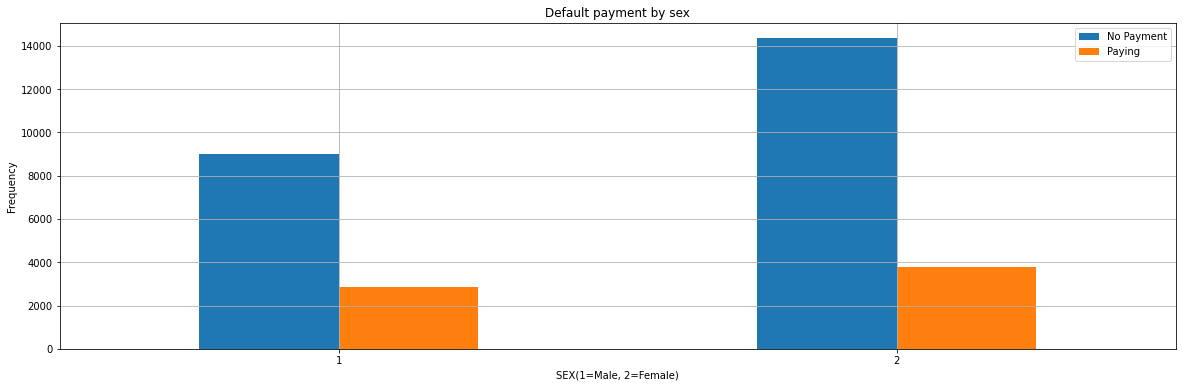

In [67]:
pd.crosstab(data.SEX, data.def_pay, normalize=False).plot(kind='bar', rot=0, figsize=(20,6))
plt.title("Default payment by sex")
plt.xlabel("SEX(1=Male, 2=Female)")
plt.legend(["No Payment", 'Paying'])
plt.ylabel('Frequency')
plt.grid()
plt.show()

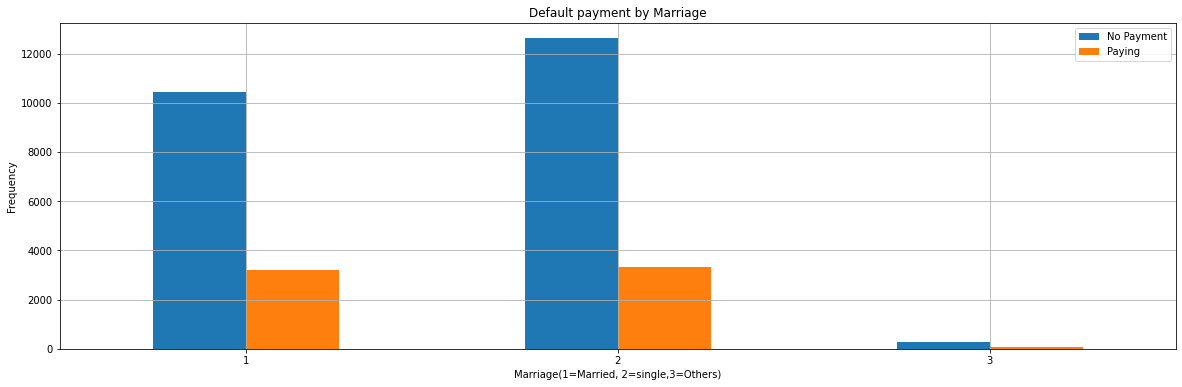

In [68]:
pd.crosstab(data.MARRIAGE, data.def_pay, normalize=False).plot(kind='bar', rot=0, figsize=(20,6))
plt.title("Default payment by Marriage")
plt.xlabel("Marriage(1=Married, 2=single,3=Others)")
plt.legend(["No Payment", 'Paying'])
plt.ylabel('Frequency')
plt.grid()
plt.show()

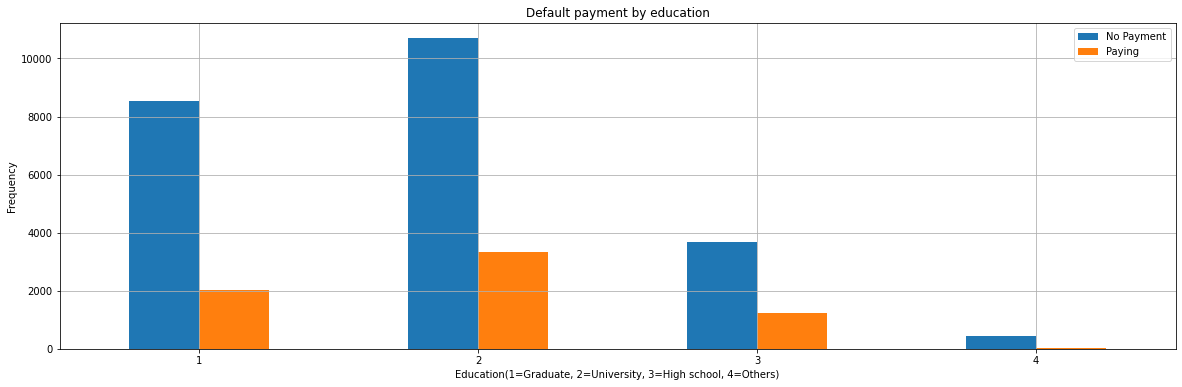

In [69]:
pd.crosstab(data.EDUCATION, data.def_pay, normalize=False).plot(kind='bar', rot=0, figsize=(20,6))
plt.title("Default payment by education")
plt.xlabel("Education(1=Graduate, 2=University, 3=High school, 4=Others)")
plt.legend(["No Payment", 'Paying'])
plt.ylabel('Frequency')
plt.grid()
plt.show()

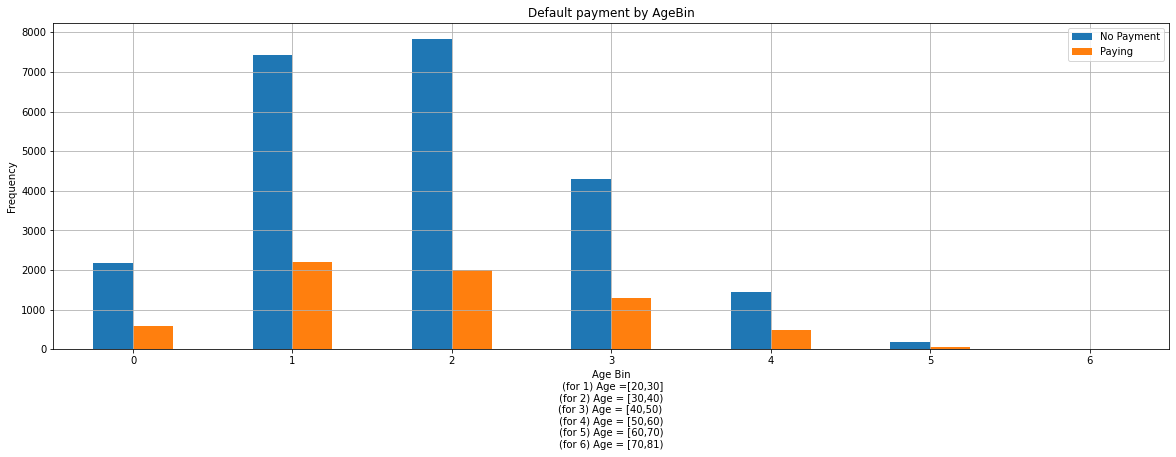

In [70]:
pd.crosstab(data.AgeBin, data.def_pay, normalize=False).plot(kind='bar', rot=0, figsize=(20,6))
plt.title("Default payment by AgeBin")
plt.xlabel("Age Bin\n (for 1) Age =[20,30]\n (for 2) Age = [30,40) \n(for 3) Age = [40,50) \n (for 4) Age = [50,60) \n (for 5) Age = [60,70) \n(for 6) Age = [70,81)")
plt.legend(["No Payment", 'Paying'])
plt.ylabel('Frequency')
plt.grid()
plt.show()

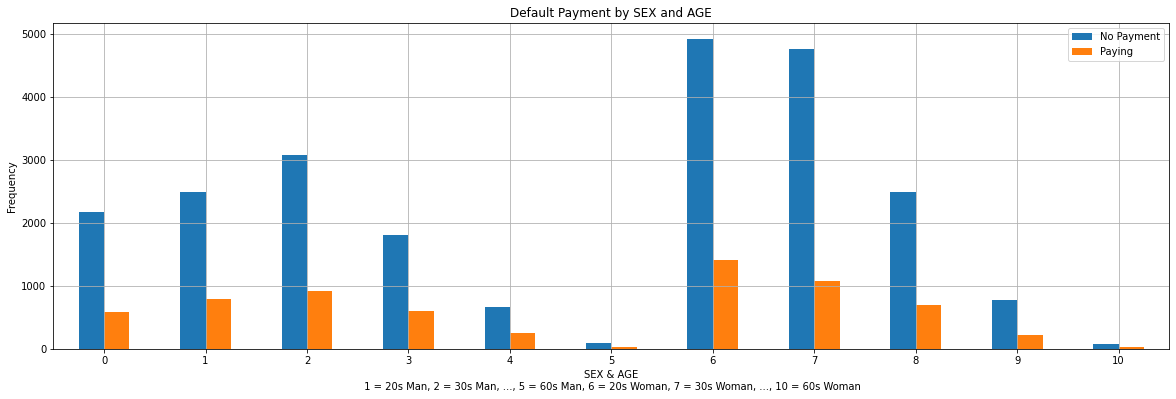

In [71]:
 pd.crosstab(data.SE_AG,data.def_pay,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by SEX and AGE')
plt.xlabel('SEX & AGE\n 1 = 20s Man, 2 = 30s Man, ..., 5 = 60s Man, 6 = 20s Woman, 7 = 30s Woman, ..., 10 = 60s Woman')
plt.legend(["No Payment", "Paying"])
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [76]:
features = ['LIMIT_BAL', 'EDUCATION','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'SE_AG', 'average_5', 'average_4',
            'average_3', 'average_2', 'average_1', 'InvoiceLimit_5', 'InvoiceLimit_6',
            'InvoiceLimit_4', 'InvoiceLimit_3', 'InvoiceLimit_2','InvoiceLimit_1',
            'active_6','active_5','active_4','active_3','active_2','active_1','PAY_1_-1',
            'PAY_1_-2', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 
            'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_-2', 
            'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 
            'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 
            'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 
            'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 
            'PAY_4_8', 'PAY_5_-1', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 
            'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 
            'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 
            'PAY_6_6', 'PAY_6_7', 'PAY_6_8']
target = 'def_pay'
y = data['def_pay'].copy()
x = data[features].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

data_train = x_train.join(y_train)

In [82]:
rfc = RandomForestClassifier(random_state=42, n_estimators=200, criterion = 'entropy', max_features='sqrt', max_depth=7, verbose=False)
rfc.fit(x_train[features], y_train)
rfcprediction = rfc.predict(x_test[features])
print("Accuracy of RFC:",accuracy_score(rfcprediction, y_test))

Accuracy of RFC: 0.8201666666666667


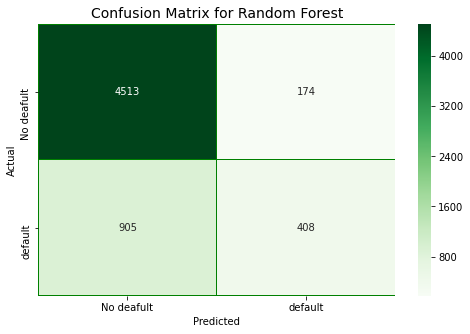

Roc Score of Random Forest : 0.636807403147628


In [99]:
cmrfc = pd.crosstab(y_test.values, rfcprediction, rownames=['Actual'], colnames=['Predicted'])
cmrfc
fig, (ax1) = plt.subplots(ncols=1, figsize=(8,5))
sns.heatmap(cmrfc,fmt='d', annot=True,
            xticklabels=['No deafult', 'default'],
            yticklabels=['No deafult', 'default'],
            linewidths=.2, linecolor='Green', cmap='Greens')
plt.title("Confusion Matrix for Random Forest", fontsize=14)
plt.show()
rocrfc = roc_auc_score(y_test.values, rfcprediction)
print("Roc Score of Random Forest :",rocrfc)

In [102]:
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                            max_features=None, max_leaf_nodes=20,
                            min_impurity_decrease=0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=5, 
                            min_weight_fraction_leaf=0, presort=False, 
                            random_state=42, splitter='best')
dtc.fit(x_train, y_train)
dtcprediction = dtc.predict(x_test)
print("Accuracy score of Decision Tree: ",accuracy_score(dtcprediction, y_test))

Accuracy score of Decision Tree:  0.819


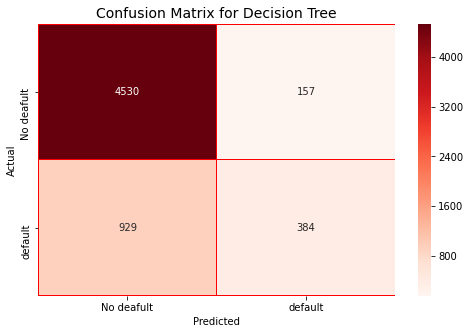

Roc Score of Random Forest : 0.6294815544478083


In [105]:
cmdtc = pd.crosstab(y_test.values, dtcprediction, rownames=['Actual'],
                    colnames=['Predicted'])
cmdtc
fig, (ax1) = plt.subplots(ncols=1, figsize=(8,5))
sns.heatmap(cmdtc,fmt='d', annot=True,
            xticklabels=['No deafult', 'default'],
            yticklabels=['No deafult', 'default'],
            linewidths=.2, linecolor='Red', cmap='Reds')
plt.title("Confusion Matrix for Decision Tree", fontsize=14)
plt.show()
rocdtc = roc_auc_score(y_test.values, dtcprediction)
print("Roc Score of Random Forest :",rocdtc)

In [106]:
knn = KNeighborsClassifier(n_neighbors=8, algorithm='auto', leaf_size=30,
                          metric='minkowski')
knn.fit(x_train,y_train)
trainaccuracy = knn.score(x_train, y_train)
testaccuracy = knn.score(x_train, y_train)
knnprediction = knn.predict(x_test)
print("train accuracy: {}\ntest Accuracy: {}".format(trainaccuracy, testaccuracy))

train accuracy: 0.7980833333333334
test Accuracy: 0.7980833333333334


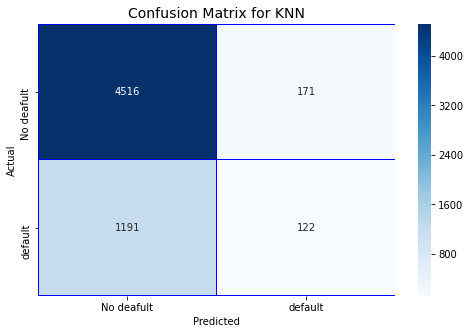

Roc Score of Random Forest : 0.5282165461954936


In [112]:
cmknn = pd.crosstab(y_test.values, knnprediction, rownames=['Actual'],
                    colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(8,5))
sns.heatmap(cmknn,fmt='d', annot=True,
            xticklabels=['No deafult', 'default'],
            yticklabels=['No deafult', 'default'], 
            linewidths=.2, linecolor='Blue', cmap='Blues')
plt.title("Confusion Matrix for KNN", fontsize=14)
plt.show()
rocknn = roc_auc_score(y_test.values, knnprediction)
print("Roc Score of Random Forest :",rocknn)

In [117]:
abc = AdaBoostClassifier(base_estimator=None, n_estimators=50,
                        learning_rate=1.5, algorithm="SAMME", random_state=42)
abc.fit(x_train, y_train)
abcprediction = abc.predict(x_test)
print(" Accuracy of Ada Boost:", accuracy_score(abcprediction, y_test))

 Accuracy of Ada Boost: 0.821


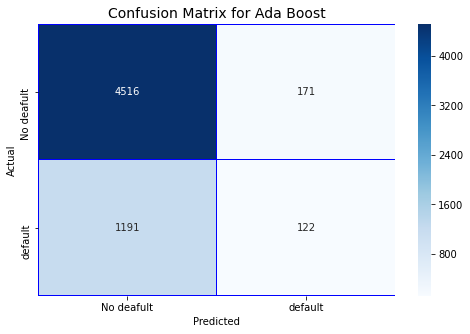

Roc Score of Random Forest : 0.6494024810729747


In [118]:
cmabc = pd.crosstab(y_test.values, abcprediction, rownames=['Actual'],
                    colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(8,5))
sns.heatmap(cmknn,fmt='d', annot=True,
            xticklabels=['No deafult', 'default'],
            yticklabels=['No deafult', 'default'], 
            linewidths=.2, linecolor='Blue', cmap='Blues')
plt.title("Confusion Matrix for Ada Boost", fontsize=14)
plt.show()
rocabc = roc_auc_score(y_test.values, abcprediction)
print("Roc Score of Random Forest :",rocabc)

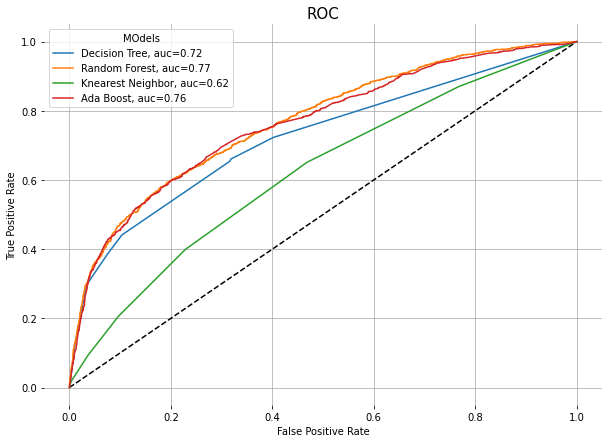

In [123]:
y_pred_proba_DT = dtc.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_DT)
auc1 = roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_RF = rfc.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_RF)
auc2 = roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_KNN = knn.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba_KNN)
auc3 = roc_auc_score(y_test, y_pred_proba_KNN)

y_pred_proba_ABC = abc.predict_proba(x_test)[::,1]
fpr4, tpr4, _ = roc_curve(y_test, y_pred_proba_ABC)
auc4 = roc_auc_score(y_test, y_pred_proba_ABC)

plt.figure(figsize=(10,7))
plt.title('ROC', size=15)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Decision Tree, auc='+str(round(auc1,2)))
plt.plot(fpr2, tpr2, label='Random Forest, auc='+str(round(auc2,2)))
plt.plot(fpr3, tpr3, label='Knearest Neighbor, auc='+str(round(auc3,2)))
plt.plot(fpr4, tpr4, label='Ada Boost, auc='+str(round(auc4,2)))
plt.legend(loc='best', title='MOdels', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.box(False)
plt.grid()
plt.show()

In [129]:
clf_list = [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                                   max_features=None, max_leaf_nodes=20,
                                   min_impurity_decrease=0.0, min_impurity_split=None,
                                   min_samples_leaf=1, min_samples_split=5,
                                   min_weight_fraction_leaf=0.0, presort=False,
                                   random_state=42, splitter='best'), 
            RandomForestClassifier(random_state=42,n_estimators=200,criterion='entropy',
                                    max_features='sqrt',max_depth=7,verbose=False),
            KNeighborsClassifier(n_neighbors=8,algorithm='auto',
                                    leaf_size=30,metric='minkowski'), 
            AdaBoostClassifier(base_estimator=None, 
                                    n_estimators=50, 
                                    learning_rate=1.5, 
                                    algorithm='SAMME', 
                                    random_state=42)
           ]

kf = KFold(n_splits=5,random_state=42,shuffle=True)
mdl=[]
fold=[]
fscr=[]
rocscr=[]
accscr=[]

for i, (train_index, test_index) in enumerate(kf.split(data_train)):
    training = data.iloc[train_index,:]
    valid = data.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[features] #defined above
        label = training['def_pay']
        valid_feats = valid[features]
        valid_label = valid['def_pay']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        fscore = f1_score(y_true = valid_label, y_pred = pred)
        rocscore = roc_auc_score(valid_label, pred)
        accscore = accuracy_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        fscr.append(fscore)
        rocscr.append(rocscore)
        accscr.append(accscore)
        mdl.append(model)
        print(model)

0
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier
AdaBoostClassifier
1
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier
AdaBoostClassifier
2
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier
AdaBoostClassifier
3
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier
AdaBoostClassifier
4
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier
AdaBoostClassifier


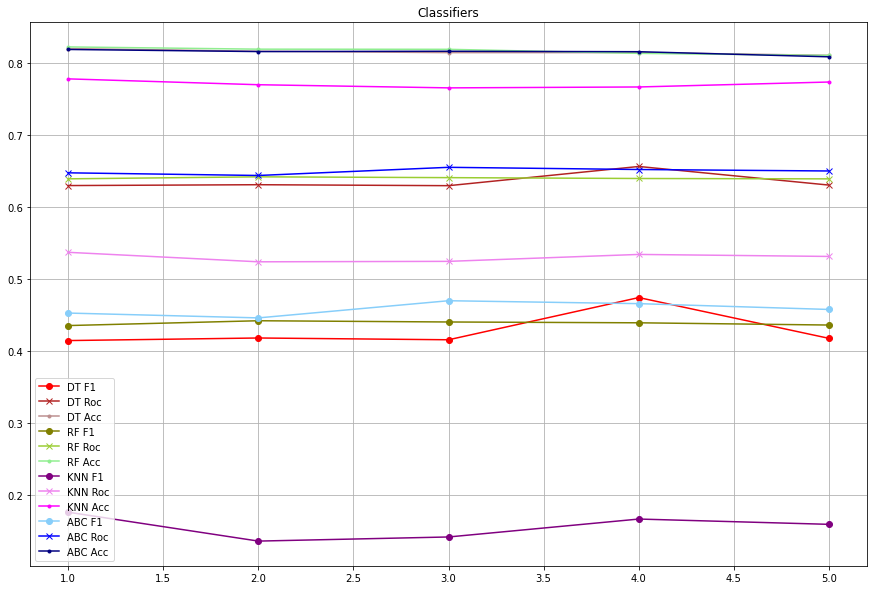

In [132]:
performance = pd.DataFrame({'Model':mdl, 'Score':fscr, 'Roc_Auc_Score':rocscr,
                           'Accuracy_Score':accscr, 'Fold':fold})
dtc = performance[performance['Model']=="DecisionTreeClassifier"]
rfc = performance[performance['Model']=='RandomForestClassifier']
abc = performance[performance['Model']=='AdaBoostClassifier']
knn = performance[performance['Model']=='KNeighborsClassifier']

plt.figure(figsize=(15,10))
plt.plot(dtc.Fold,dtc.Score, 'red',label='DT F1', marker='o')
plt.plot(dtc.Fold,dtc.Roc_Auc_Score, 'Firebrick', label='DT Roc', marker ='x')
plt.plot(dtc.Fold,dtc.Accuracy_Score, 'rosybrown', label='DT Acc', marker='.')

plt.plot(rfc.Fold,rfc.Score, 'olive',label='RF F1', marker='o')
plt.plot(rfc.Fold,rfc.Roc_Auc_Score, 'yellowgreen', label='RF Roc', marker ='x')
plt.plot(rfc.Fold,rfc.Accuracy_Score, 'lightgreen', label='RF Acc', marker='.')

plt.plot(knn.Fold,knn.Score, 'purple',label='KNN F1', marker='o')
plt.plot(knn.Fold,knn.Roc_Auc_Score, 'violet', label='KNN Roc', marker ='x')
plt.plot(knn.Fold,knn.Accuracy_Score, 'fuchsia', label='KNN Acc', marker='.')

plt.plot(abc.Fold,abc.Score, 'lightskyblue',label='ABC F1', marker='o')
plt.plot(abc.Fold,abc.Roc_Auc_Score, 'blue', label='ABC Roc', marker ='x')
plt.plot(abc.Fold,abc.Accuracy_Score, 'navy', label='ABC Acc', marker='.')

plt.title("Classifiers")
plt.legend(loc='best')
plt.grid()
plt.show()

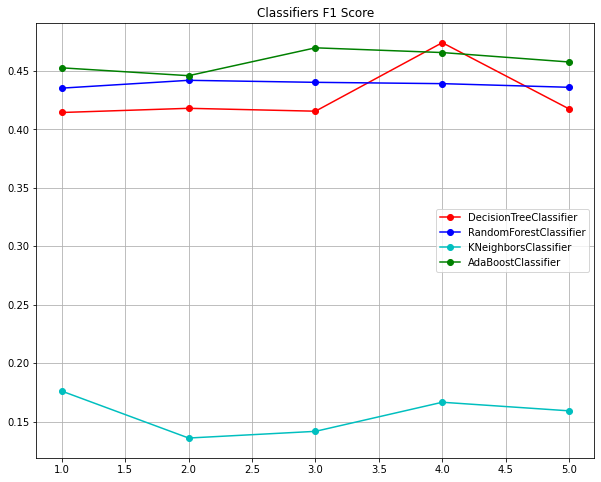

In [134]:
plt.figure(figsize=(10,8))
plt.plot(dtc.Fold,dtc.Score,'r',label='DecisionTreeClassifier', marker='o')
plt.plot(rfc.Fold,rfc.Score,'b',label='RandomForestClassifier', marker='o')
plt.plot(knn.Fold,knn.Score,'c',label='KNeighborsClassifier', marker='o')
plt.plot(abc.Fold,abc.Score,'g',label='AdaBoostClassifier', marker='o')
plt.title("Classifiers F1 Score")
plt.legend(loc='best')
plt.grid()
plt.show()

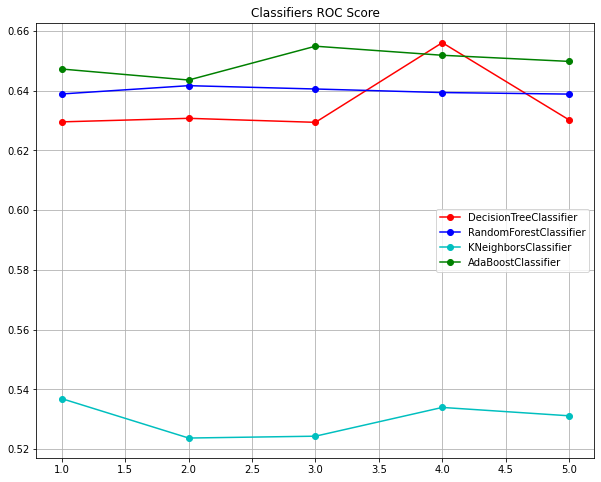

In [135]:
plt.figure(figsize=(10,8))
plt.plot(dtc.Fold,dtc.Roc_Auc_Score,'r',label='DecisionTreeClassifier', marker='o')
plt.plot(rfc.Fold,rfc.Roc_Auc_Score,'b',label='RandomForestClassifier', marker='o')
plt.plot(knn.Fold,knn.Roc_Auc_Score,'c',label='KNeighborsClassifier', marker='o')
plt.plot(abc.Fold,abc.Roc_Auc_Score,'g',label='AdaBoostClassifier', marker='o')
plt.title("Classifiers ROC Score")
plt.legend(loc='best')
plt.grid()
plt.show()

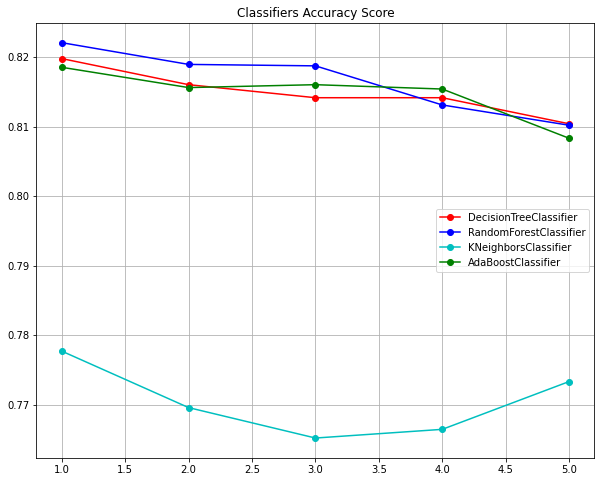

In [139]:
plt.figure(figsize=(10,8))
plt.plot(dtc.Fold,dtc.Accuracy_Score,'r',label='DecisionTreeClassifier', marker='o')
plt.plot(rfc.Fold,rfc.Accuracy_Score,'b',label='RandomForestClassifier', marker='o')
plt.plot(knn.Fold,knn.Accuracy_Score,'c',label='KNeighborsClassifier', marker='o')
plt.plot(abc.Fold,abc.Accuracy_Score,'g',label='AdaBoostClassifier', marker='o')
plt.title("Classifiers Accuracy Score")
plt.legend(loc='best')
plt.grid()
plt.show()

In [141]:
new_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'average_4','average_3', 'average_2', 'average_1', 'InvoiceLimit_5',
            'InvoiceLimit_4', 'InvoiceLimit_3', 'InvoiceLimit_2','InvoiceLimit_1', 
            'PAY_1_1', 'PAY_1_2',
            'PAY_2_0', 'PAY_2_2', 'PAY_2_3', 
            'PAY_3_0', 
            'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_4_0', 'PAY_4_1', 
            'PAY_4_2', 'PAY_4_3', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
            'PAY_6_2']

rfc_new = RandomForestClassifier(random_state=42, n_estimators=200,
                                criterion='entropy',
                                max_features='sqrt',
                                max_depth=7,
                                verbose=False)
rfc_new.fit(x_train[new_features], y_train)
rfcprediction_new = rfc_new.predict(x_test[new_features])
print("Accuracy of new Random Forest: ",accuracy_score(rfcprediction_new, y_test))

Accuracy of new Random Forest:  0.8218333333333333


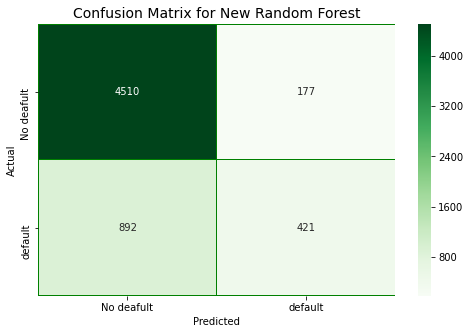

Roc Score of Random Forest : 0.6414378640601583


In [144]:
cmrfc_new = pd.crosstab(y_test.values, rfcprediction_new, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(8,5))
sns.heatmap(cmrfc_new,fmt='d', annot=True,
            xticklabels=['No deafult', 'default'],
            yticklabels=['No deafult', 'default'],
            linewidths=.2, linecolor='Green', cmap='Greens')
plt.title("Confusion Matrix for New Random Forest", fontsize=14)
plt.show()
rocrfc_new = roc_auc_score(y_test.values, rfcprediction_new)
print("Roc Score of Random Forest :",rocrfc_new)

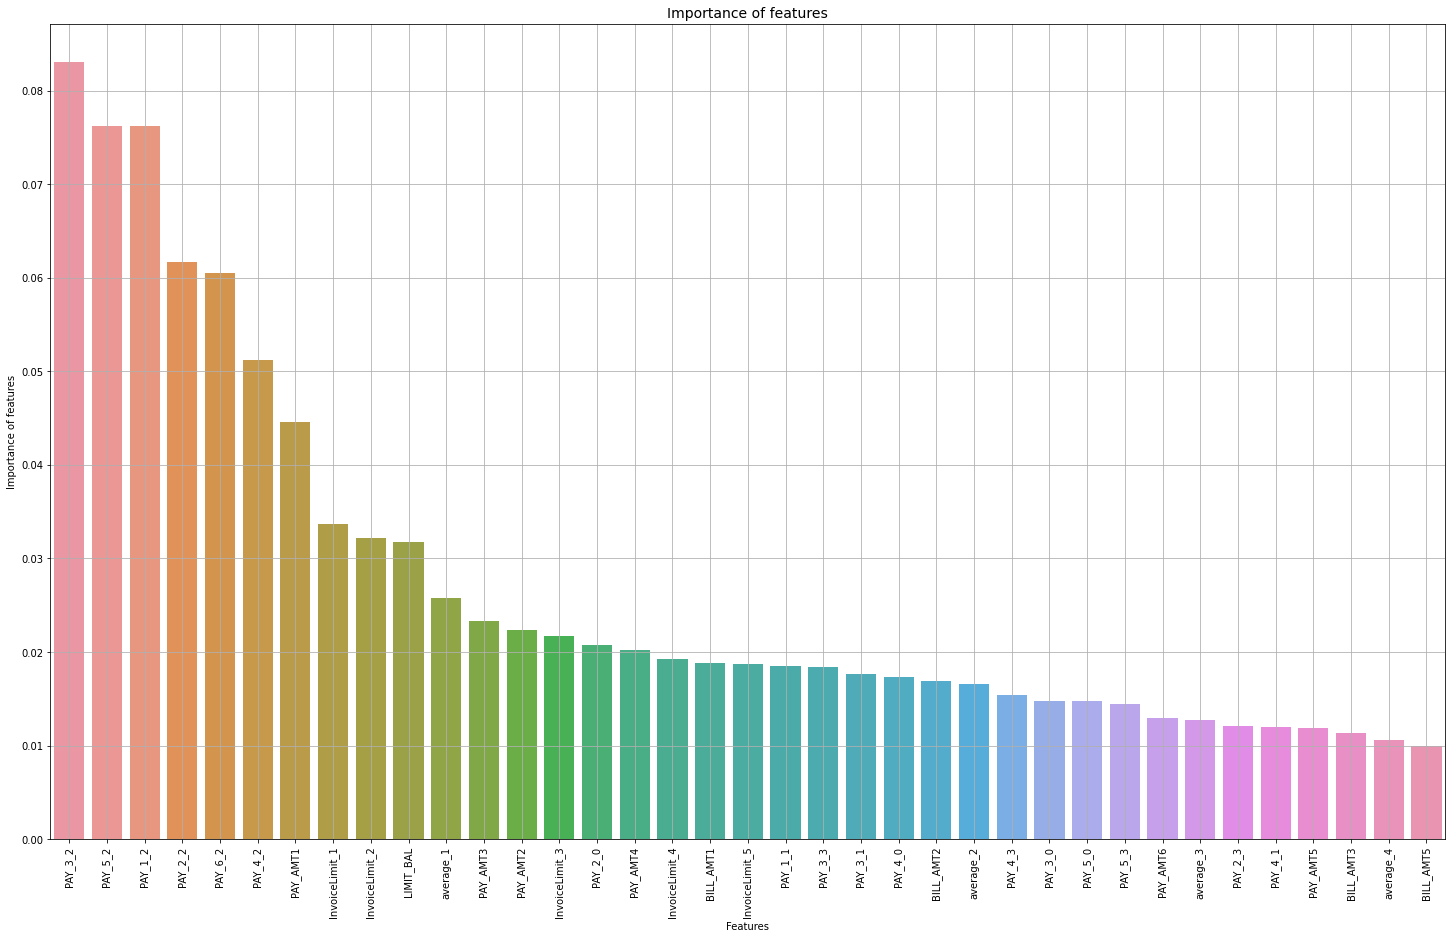

In [150]:
tmp = pd.DataFrame({'Features': new_features, 
                    'Importance of features': rfc_new.feature_importances_})
tmp = tmp.sort_values(by='Importance of features', ascending = False)
plt.figure(figsize = (25,15))
plt.title("Importance of features", size=14)
s = sns.barplot(x='Features', y='Importance of features', data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.grid()
plt.show()